In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
fuel= pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\cleanFuelAndTech.csv")

In [4]:
fuel.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Proportion of population with primary reliance...,2018,37
1,Afghanistan,Proportion of population with primary reliance...,2017,34
2,Afghanistan,Proportion of population with primary reliance...,2016,31
3,Afghanistan,Proportion of population with primary reliance...,2015,29
4,Afghanistan,Proportion of population with primary reliance...,2014,27


In [5]:
allCountries =fuel['Location'].unique().tolist()

In [6]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = fuel[fuel['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("population")
    plt.title("Proportion of population with primary reliance on clean fuels and technologies (%)")
    plt.show()

In [7]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

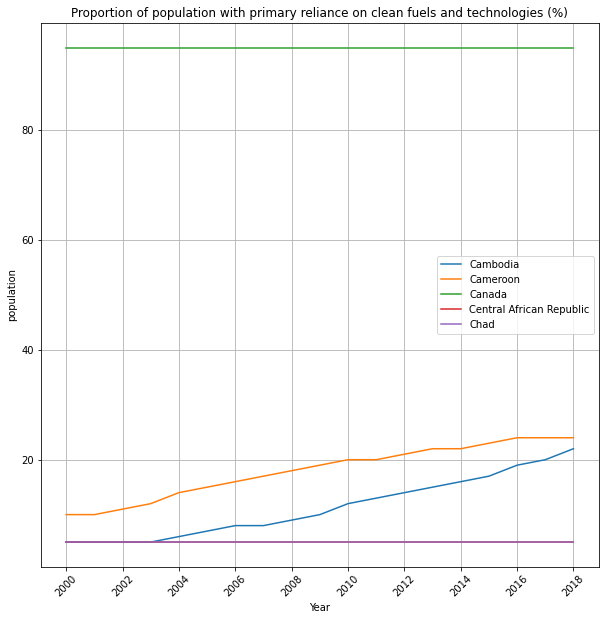

In [14]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

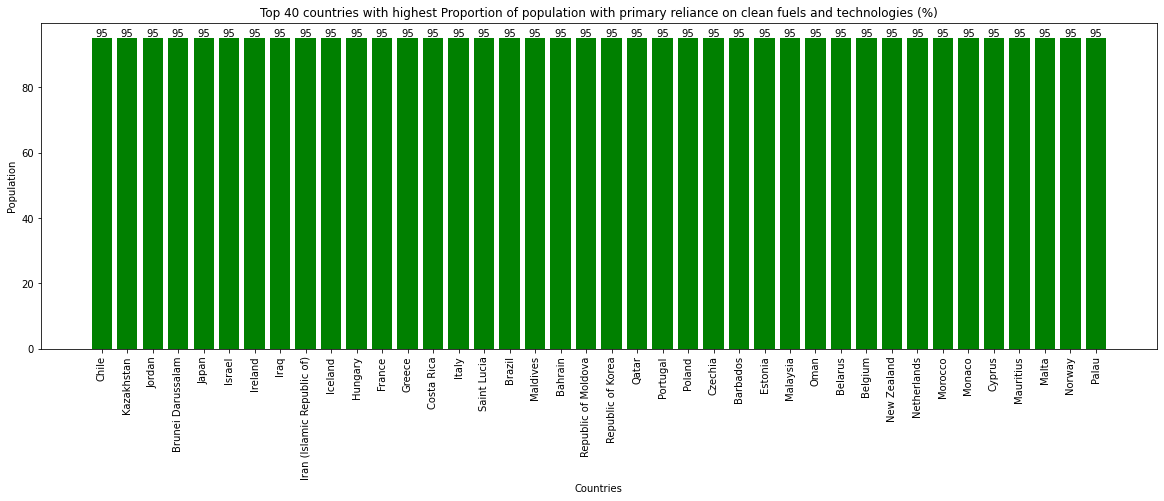

In [18]:
tempData = fuel[fuel['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-40:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "green")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("Top 40 countries with highest Proportion of population with primary reliance on clean fuels and technologies (%)")
plt.show()

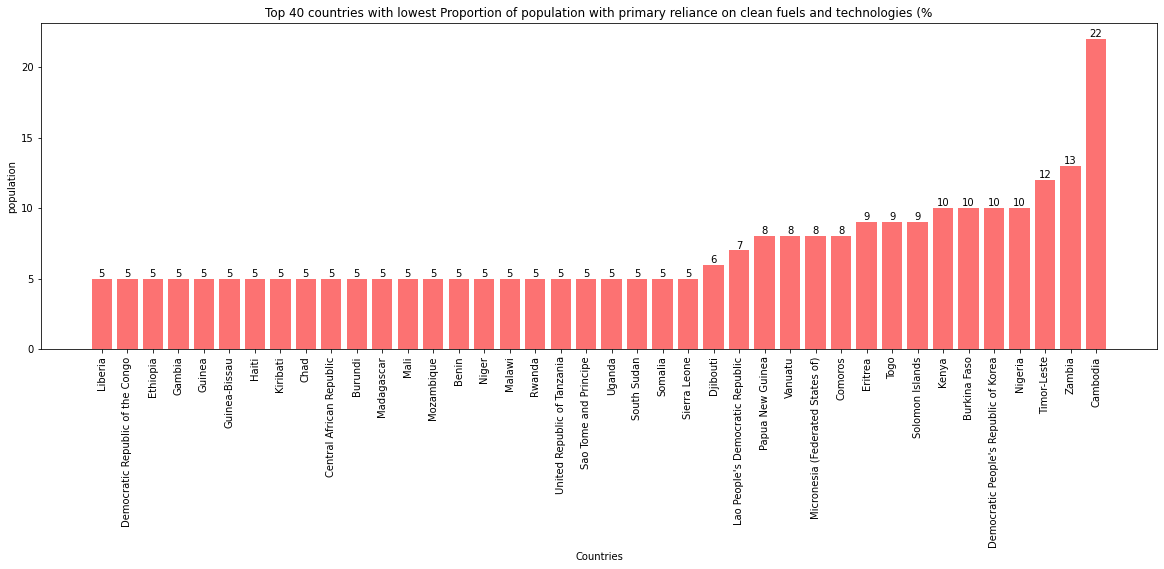

In [20]:
tempData = fuel[fuel['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:40]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("population")
plt.title("Top 40 countries with lowest Proportion of population with primary reliance on clean fuels and technologies %")
plt.show()

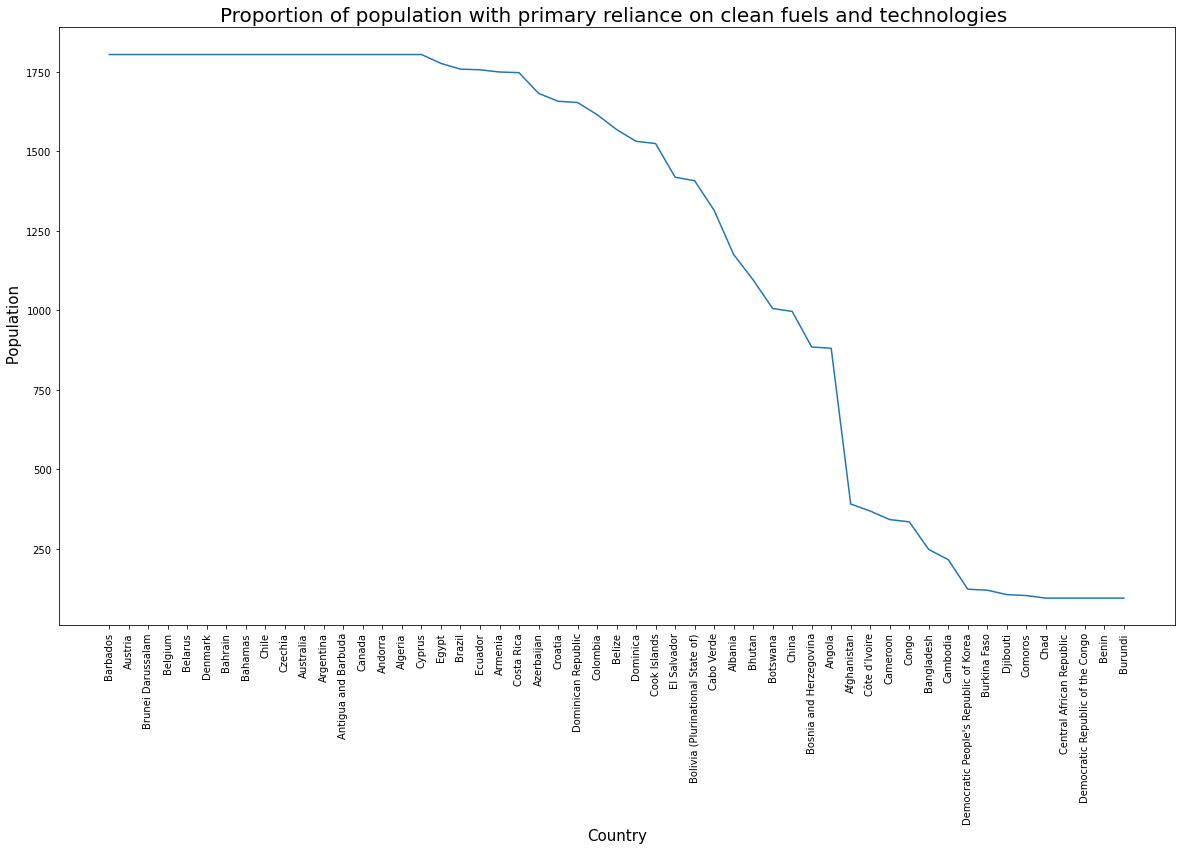

In [22]:
df = fuel[fuel['Location']=='Afghanistan']
water_sort = pd.DataFrame([])
water_sort0 = []
water_sort1 = []
index = []

for i in np.unique(fuel['Location'][:1000]):
    water_sort0.append(i)
    water_sort1.append(fuel['First Tooltip'][fuel['Location']==i].sum())
    index.append(list(fuel['Location'][fuel['Location']==i].index)[0])
    
water_sort['Name'] = water_sort0
water_sort['Value'] = water_sort1
water_sort.index = index
water_sort = water_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(water_sort['Name'], water_sort['Value'])
plt.title('Proportion of population with primary reliance on clean fuels and technologies ', size=20)
plt.xlabel('Country', size=15)
plt.ylabel(' Population', size=15)
plt.xticks(rotation=90, size=10)
plt.show()

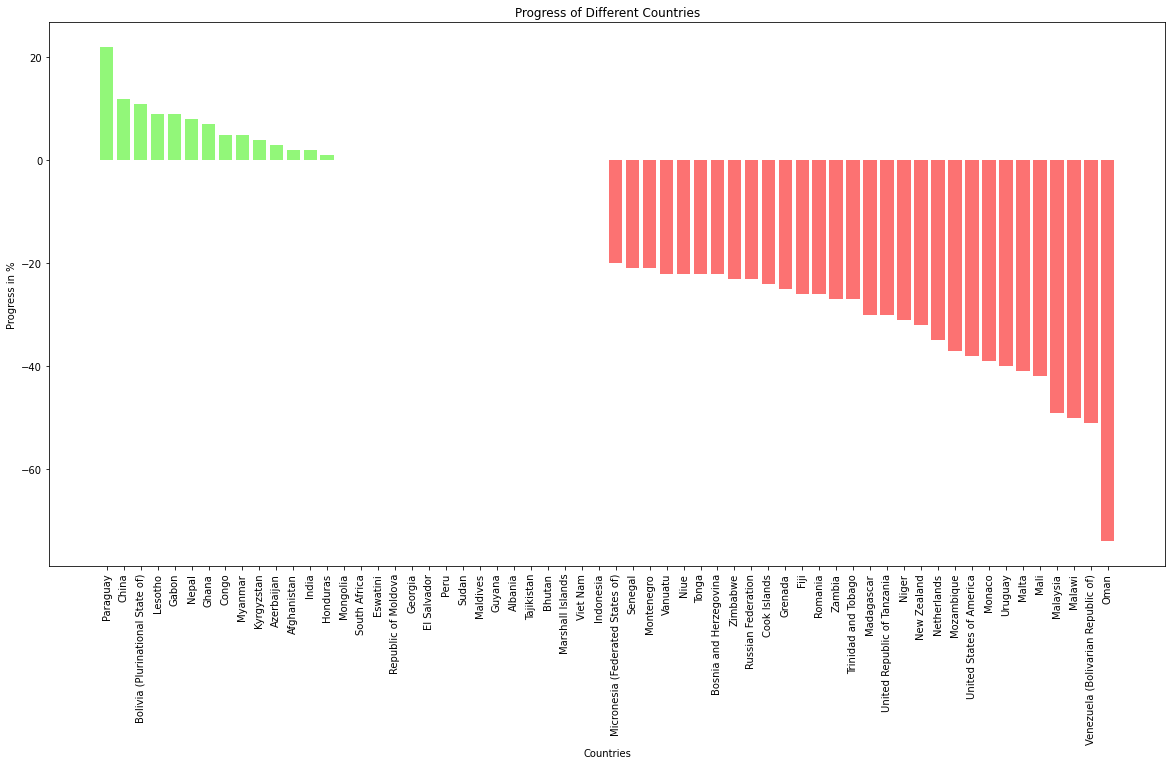

In [23]:

tempData2018 = fuel[fuel['Period'] == 2018]
tempData2000 = fuel[fuel['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-30:]
tempDataBot = tempData[:30]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress in %")
plt.title("Progress of Different Countries")
plt.show()

Three Coutries in which most   population with primary reliance on clean fuels and technologies


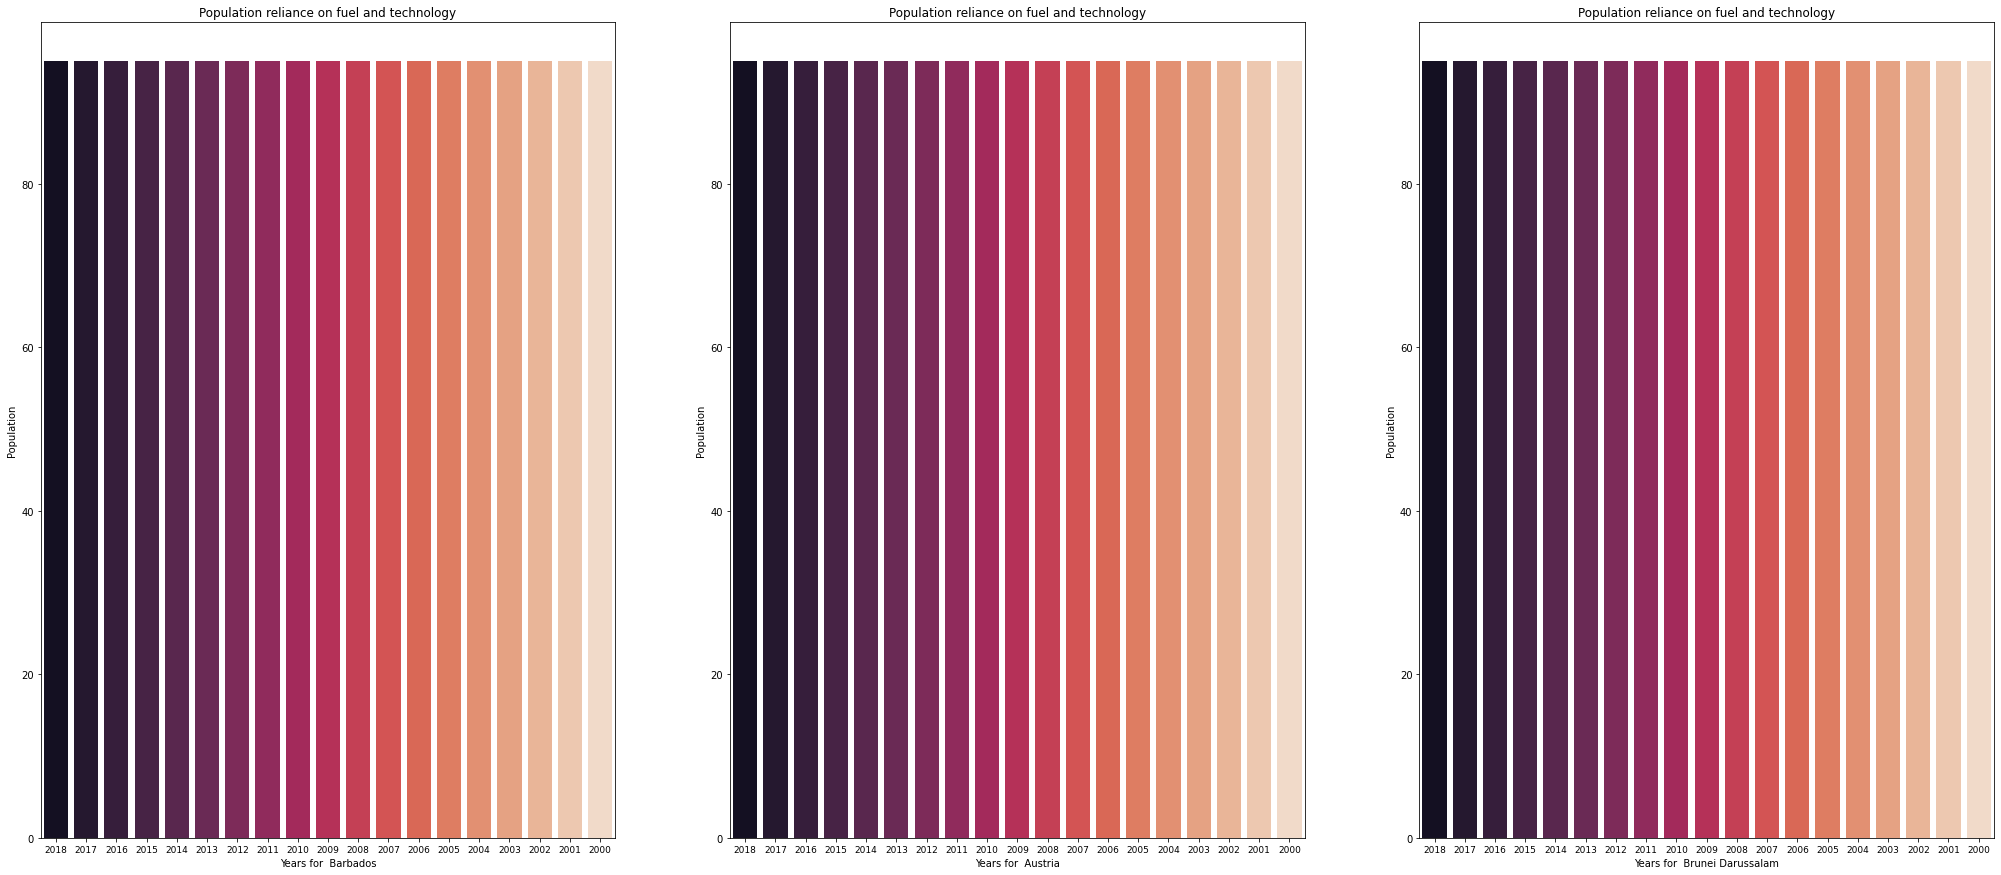

In [37]:
print("Three Coutries in which most   population with primary reliance on clean fuels and technologies")

fig, axes = plt.subplots(1, 3, figsize=(35, 15))
countries = list(water_sort[:3]['Name'])

for country in countries:
    df = fuel[fuel['Location']==country]
    labels = []
    
    for year in fuel['Period'][fuel['Location']==country]:
        labels.append(year)
    
    sns.barplot(data=df, x='Period', y='First Tooltip', palette='rocket', 
                ax=axes[countries.index(country)])
    axes[countries.index(country)].set_title('Population reliance on fuel and technology')
    axes[countries.index(country)].set_xlabel('Years for  ' + country)
    axes[countries.index(country)].set_ylabel('Population')
    axes[countries.index(country)].set_xticklabels(labels=labels, fontsize=9)
plt.show()

Three Coutries in which least   population with primary reliance on clean fuels and technologies


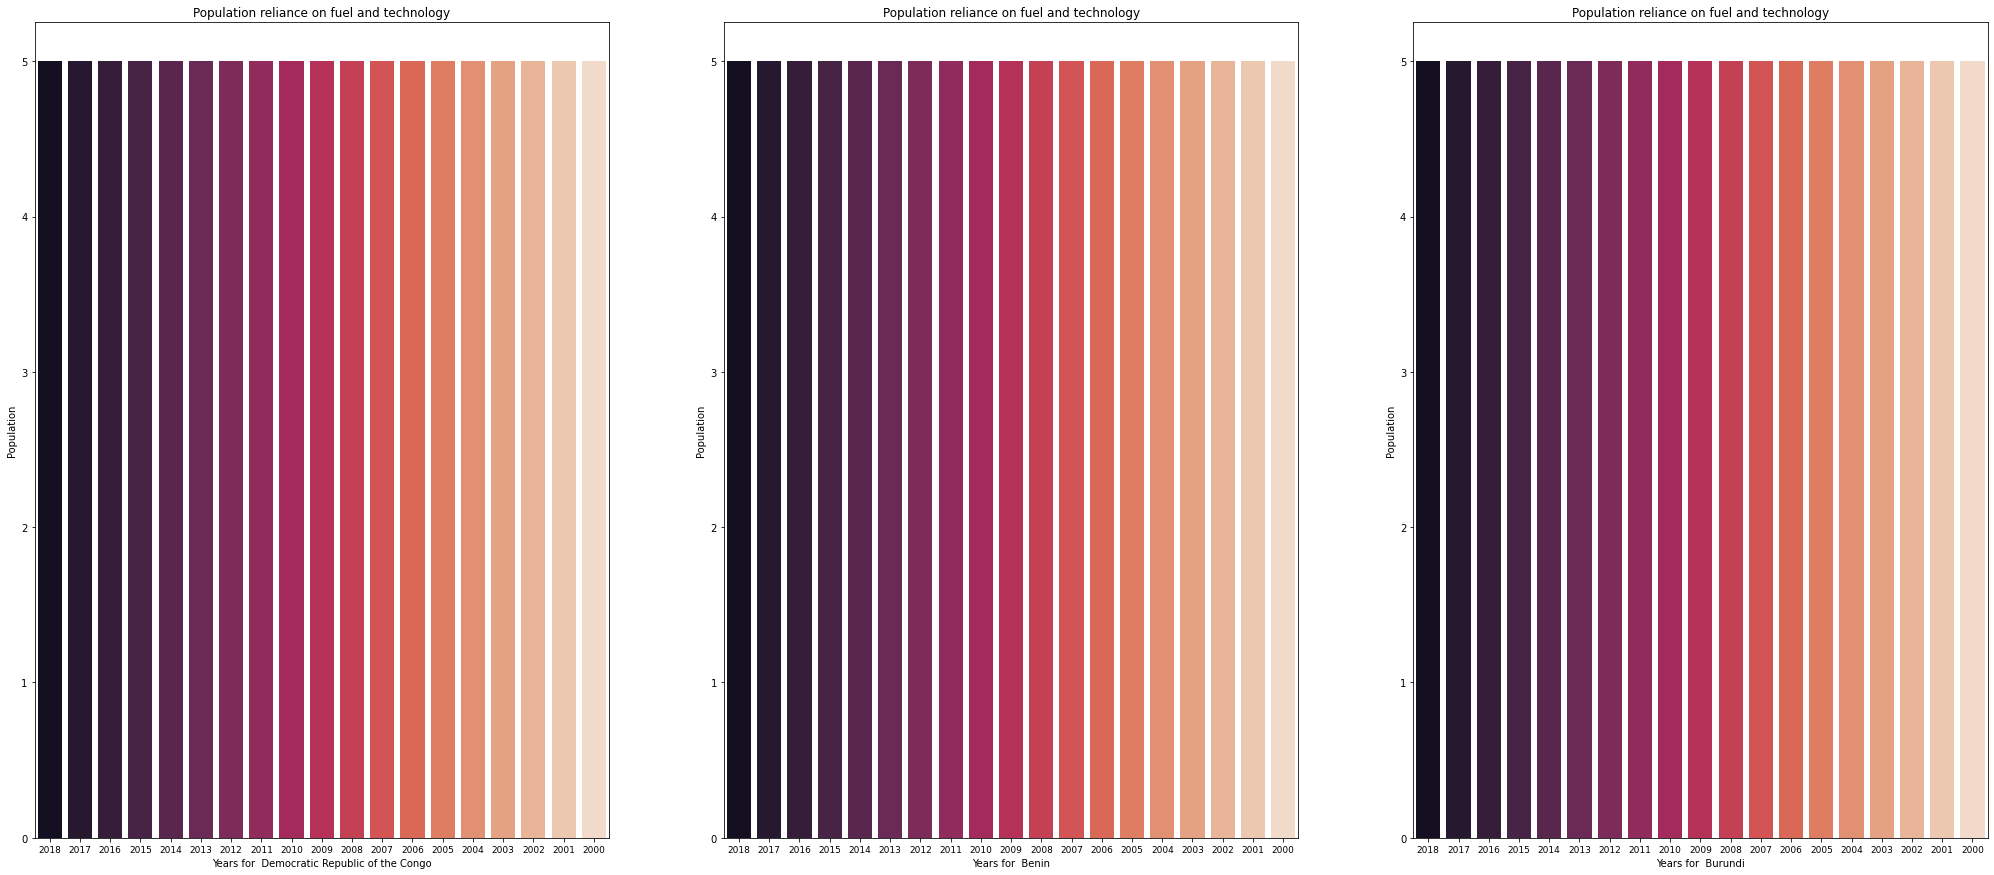

In [36]:
print("Three Coutries in which least   population with primary reliance on clean fuels and technologies")

fig, axes = plt.subplots(1, 3, figsize=(35, 15))
countries = list(water_sort[-3:]['Name'])

for country in countries:
    df = fuel[fuel['Location']==country]
    labels = []
    
    for year in fuel['Period'][fuel['Location']==country]:
        labels.append(year)
    
    sns.barplot(data=df, x='Period', y='First Tooltip', palette='rocket', 
                ax=axes[countries.index(country)])
    axes[countries.index(country)].set_title('Population reliance on fuel and technology')
    axes[countries.index(country)].set_xlabel('Years for  ' + country)
    axes[countries.index(country)].set_ylabel('Population')
    axes[countries.index(country)].set_xticklabels(labels=labels, fontsize=9)
plt.show()